In [1]:
import warnings # 경고 메시지를 출력하지 않게 하기 위해 improt
warnings.filterwarnings("ignore") # 경고 메시지를 출력하지 않게 한다.
import numpy as np # 수치 계산, 배열 처리를 위해 import 한다.
import pandas as pd # 데이터 분석을 위한 전처리를 위해 import 한다.
import matplotlib as mpl # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지하기 위해 import한다.
mpl.rcParams['axes.unicode_minus'] = False # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 것을 방지한다.
import matplotlib.pyplot as plt # 시각화를 하기 위해 import한다.
plt.rcParams["font.family"] = "Pretendard" # matplotlib에서 사용할 글꼴을 지정한다.
plt.rcParams["font.size"] = 10 # matplotlib에서 사용할 글꼴 크기를 지정한다.
import seaborn as sns # 시각화를 하기 위해 import한다. matplotlib 기반으로 만든 시각화 도구
from plotnine import * # R의 ggplot2 패키지를 사용하는 것처럼 만드는 시각화 도구를 import한다.
import missingno as msno # 누락값의 분포를 그래프 형태로 표현한다.
import folium
# import requests
# import json
# from pandas.io.json import json_normalize
# from bs4 import BeautifulSoup

In [3]:
'''
주제: 서울의 카테고리별 관광지 정보를 얻어와서 지도에 마커로 꽂기
=> 마커가 많을 수록 갈만하다는 것이 됨
=> 행 수가 2000여개로 많지는 않지만 각각 다른 데이터 파일 10개를 통합하고 정제하여 하나의 결과를 냄

서울 버스나 지하철 데이터와 연동해서 보여줘도 괜찮을 듯?
'''

'\n주제: 서울의 카테고리별 관광지 정보를 얻어와서 지도에 마커로 꽂기\n=> 마커가 많을 수록 갈만하다는 것이 됨\n=> 행 수가 2000여개로 많지는 않지만 각각 다른 데이터 파일 10개를 통합하고 정제하여 하나의 결과를 냄\n\n서울 버스나 지하철 데이터와 연동해서 보여줘도 괜찮을 듯?\n'

In [4]:
seoul_tour_shopping = pd.read_csv('./data/seoul_tour_shopping.csv', encoding='cp949')
seoul_tour_shopping

,키,분류1,분류2,분류3,검색어,명칭,행정 시,행정 구,행정 동
0,BE_IW17-0102,쇼핑/여가/가정,백화점,백화점 일반,월드면세백화점,월드면세백화점,서울특별시,용산구,남영동
1,BE_IW17-0103,쇼핑/여가/가정,백화점,백화점 일반,잡곡종합백화점,잡곡종합백화점,서울특별시,양천구,신정3동
2,BE_IW17-0104,쇼핑/여가/가정,백화점,백화점 일반,청량리현대코아,청량리현대코아,서울특별시,동대문구,청량리동
3,BE_IW17-0105,쇼핑/여가/가정,백화점,백화점 일반,태평백화점,태평백화점,서울특별시,동작구,사당2동
4,BE_IW17-0106,쇼핑/여가/가정,백화점,백화점 일반,행복한백화점,행복한백화점,서울특별시,양천구,목1동
...,...,...,...,...,...,...,...,...,...
142,BE_IW17-0097,쇼핑/여가/가정,백화점,백화점 일반,경방/타임스퀘어,경방타임스퀘어,서울특별시,영등포구,영등포동
143,BE_IW17-0098,쇼핑/여가/가정,백화점,백화점 일반,동방백화점,동방백화점,서울특별시,동대문구,제기동
144,BE_IW17-0099,쇼핑/여가/가정,백화점,백화점 일반,선플라자백화점,선플라자백화점,서울특별시,영등포구,대림1동
145,BE_IW17-0100,쇼핑/여가/가정,백화점,백화점 일반,세운백화점,세운백화점,서울특별시,종로구,종로1.2.3.4가동


In [5]:
seoul_tour_culture = pd.read_csv('./data/seoul_tour_culture.csv', encoding='cp949')
seoul_tour_culture


,메인 키,분류1,분류2,분류3,분류4,검색어,명칭,지번 주소,도로명 주소,행정 시,행정 구,행정 동
0,BE_LiST36-0085,교육/예술/종교,문화시설,미술관,NaN,인사아트센터,인사아트센터,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
1,BE_LiST36-0086,교육/예술/종교,문화시설,미술관,NaN,일랑미술관,일랑미술관,NaN,NaN,서울특별시,종로구,평창동
2,BE_LiST36-0087,교육/예술/종교,문화시설,미술관,NaN,일오삼갤러리,일오삼갤러리,NaN,NaN,서울특별시,서초구,반포4동
3,BE_LiST36-0088,교육/예술/종교,문화시설,미술관,NaN,자하미술관,자하미술관,NaN,NaN,서울특별시,종로구,부암동
4,BE_LiST36-0089,교육/예술/종교,문화시설,미술관,NaN,장은선갤러리,장은선갤러리,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
...,...,...,...,...,...,...,...,...,...,...,...,...
235,BE_LiST36-0080,교육/예술/종교,문화시설,미술관,NaN,예화랑,예화랑,NaN,NaN,서울특별시,강남구,신사동
236,BE_LiST36-0081,교육/예술/종교,문화시설,미술관,NaN,유아트/스페이스,유아트스페이스,NaN,NaN,서울특별시,강남구,청담동
237,BE_LiST36-0082,교육/예술/종교,문화시설,미술관,NaN,이목화랑,이목화랑,NaN,NaN,서울특별시,종로구,가회동
238,BE_LiST36-0083,교육/예술/종교,문화시설,미술관,NaN,이즈갤러리,이즈갤러리,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동


In [6]:
seoul_tour_food = pd.read_csv('./data/seoul_tour_food.csv', encoding='cp949')
seoul_tour_food

,키,분류1,분류2,분류3,검색어,명칭,행정 시,행정 구,행정 동
0,BE_IW16-0502,한식/중식/일식,전통음식,한식 일반,솔로몬가든,솔로몬가든,서울특별시,강북구,인수동
1,BE_IW16-0503,한식/중식/일식,전통음식,한식 일반,솔밭골,솔밭골,서울특별시,동작구,대방동
2,BE_IW16-0504,한식/중식/일식,전통음식,한식 일반,솔밭숯불갈비,솔밭숯불갈비,서울특별시,강북구,송천동
3,BE_IW16-0505,한식/중식/일식,전통음식,한식 일반,솔향기,솔향기,서울특별시,영등포구,양평2동
4,BE_IW16-0506,한식/중식/일식,전통음식,한식 일반,솔향기,솔향기,서울특별시,용산구,원효로1동
...,...,...,...,...,...,...,...,...,...
1099,BE_IW16-0070,한식/중식/일식,전통음식,한식 일반,고기시장,고기시장,서울특별시,양천구,신월5동
1100,BE_IW16-0071,한식/중식/일식,전통음식,한식 일반,고덕가든,고덕가든,서울특별시,강동구,고덕1동
1101,BE_IW16-0072,한식/중식/일식,전통음식,한식 일반,고래불,고래불,서울특별시,강남구,역삼1동
1102,BE_IW16-0073,한식/중식/일식,전통음식,한식 일반,고메홈,고메홈,서울특별시,강남구,대치4동


In [7]:
seoul_tour_zoo = pd.read_csv('./data/seoul_tour_zoo.csv', encoding='cp949')
seoul_tour_zoo

,키,분류1,분류2,분류3,검색어,명칭,행정 시,행정 구,행정 동
0,BE_IW08-0001,관광/숙박,테마-보호구역,동물원,동물원,동물원,서울특별시,광진구,능동
1,BE_IW08-0002,관광/숙박,테마-보호구역,동물원,세계파충류/공원,세계파충류공원,서울특별시,광진구,능동
2,BE_IW08-0003,관광/숙박,테마-보호구역,동물원,원숭이학교,원숭이학교,서울특별시,강남구,삼성1동
3,BE_IW08-0004,관광/숙박,테마-보호구역,동물원,코끼리동물원,코끼리동물원,서울특별시,광진구,능동
4,BE_IW08-0005,관광/숙박,테마-보호구역,식물원,곤충식물원,곤충식물원,서울특별시,성동구,성수1가1동
5,BE_IW08-0006,관광/숙박,테마-보호구역,식물원,관악산야외식물원,관악산야외식물원,서울특별시,관악구,대학동
6,BE_IW08-0007,관광/숙박,테마-보호구역,식물원,금강난식물원,금강난식물원,서울특별시,강동구,길동
7,BE_IW08-0008,관광/숙박,테마-보호구역,식물원,금란조경/꽃식물원,금란조경꽃식물원,서울특별시,도봉구,방학3동
8,BE_IW08-0009,관광/숙박,테마-보호구역,식물원,남산야외/식물원,남산야외식물원,서울특별시,용산구,후암동
9,BE_IW08-0010,관광/숙박,테마-보호구역,식물원,남산야외/식물원,남산야외식물원,서울특별시,용산구,이태원2동


In [8]:
seoul_tour_drama = pd.read_csv('./data/seoul_tour_drama.csv', encoding='cp949')
seoul_tour_drama

,키,분류1,분류2,분류3,검색어,명칭,행정 시,행정 구,행정 동
0,BE_IW04-0059,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,대망촬영지,대망촬영지,NaN,NaN,NaN
1,BE_IW04-0060,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,대왕세종촬영장,대왕세종촬영장,NaN,NaN,NaN
2,BE_IW04-0061,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,대장금촬영지,대장금촬영지,NaN,NaN,NaN
3,BE_IW04-0062,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,대장금촬영지,대장금촬영지,NaN,NaN,NaN
4,BE_IW04-0063,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,대장금촬영지,대장금촬영지,전라남도,구례군,토지면
...,...,...,...,...,...,...,...,...,...
281,BE_IW04-0243,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,친구촬영지,친구촬영지,NaN,NaN,NaN
282,BE_IW04-0244,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,쾌걸춘향/촬영지,쾌걸춘향촬영지,전라북도,남원시,노암동
283,BE_IW04-0245,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,클래식촬영지,클래식촬영지,경기도,수원시 팔달구,행궁동
284,BE_IW04-0246,관광/숙박,테마-보호구역,영화/드라마/CF 촬영소,클래식촬영지,클래식촬영지,NaN,NaN,NaN


In [9]:
seoul_tour_museum = pd.read_csv('./data/seoul_tour_museum.csv', encoding='cp949')
seoul_tour_museum

,키값,분류1,분류2,분류3,분류4,검색어,명칭,주소,도로명주소,행정시,행정구,행정동
0,BE_LiST38-0001,교육/예술/종교,문화시설,박물관,NaN,경찰박물관,경찰박물관,NaN,NaN,서울특별시,종로구,사직동
1,BE_LiST38-0002,교육/예술/종교,문화시설,박물관,NaN,국립/고궁박물관,국립고궁박물관,NaN,NaN,서울특별시,종로구,청운효자동
2,BE_LiST38-0003,교육/예술/종교,문화시설,박물관,NaN,국립/중앙박물관,국립중앙박물관,NaN,NaN,서울특별시,용산구,서빙고동
3,BE_LiST38-0004,교육/예술/종교,문화시설,박물관,NaN,대한민국/역사박물관,대한민국역사박물관,NaN,NaN,서울특별시,종로구,사직동
4,BE_LiST38-0005,교육/예술/종교,문화시설,박물관,NaN,도검박물관,도검박물관,NaN,NaN,서울특별시,종로구,평창동
5,BE_LiST38-0006,교육/예술/종교,문화시설,박물관,NaN,매헌윤봉길/의사기념관,매헌윤봉길의사기념관,NaN,NaN,서울특별시,서초구,양재2동
6,BE_LiST38-0007,교육/예술/종교,문화시설,박물관,NaN,명인박물관,명인박물관,NaN,NaN,서울특별시,종로구,가회동
7,BE_LiST38-0008,교육/예술/종교,문화시설,박물관,NaN,몽촌역사관,몽촌역사관,NaN,NaN,서울특별시,송파구,오륜동
8,BE_LiST38-0009,교육/예술/종교,문화시설,박물관,NaN,민속박물관,민속박물관,NaN,NaN,서울특별시,종로구,청운효자동
9,BE_LiST38-0010,교육/예술/종교,문화시설,박물관,NaN,박을복자수/박물관,박을복자수박물관,NaN,NaN,서울특별시,강북구,우이동


In [10]:
seoul_tour_nature = pd.read_csv('./data/seoul_tour_nature.csv', encoding='cp949')
seoul_tour_nature

,키,명칭,대분류,주소,행정 시,행정 구,행정 동,대표전화,면적,지정일,교?안내
0,BE_IW14-0020,진관내동 생태경관보전지역,생태탐방,은평구 진관동 282-1번지 일대(북한산국립공원 북한산성 입구 주변 습지 ),서울특별시,은평구,진관동,02-2115-7550~5 02-350-1397,16639㎡,2002년 12월 30일,지하철 3호선 구파발역 1번 출구에서 704번 34번 버스를 타고 북한산성 입구에서...
1,BE_IW14-0109,안산공원,산과공원,서울특별시 서대문구 홍제동 산33번지 일대,서울특별시,서대문구,홍제1동,02-330-1395,NaN,NaN,NaN
2,BE_IW14-0110,여의도공원,산과공원,서울특별시 영등포구 여의공원로68(여의도동 2번지),서울특별시,영등포구,여의동,02-761-4079,NaN,NaN,NaN
3,BE_IW14-0111,염창공원,산과공원,서울 강서구 염창동 산24-1,서울특별시,강서구,염창동,02-2600-4186,NaN,NaN,NaN
4,BE_IW14-0112,영등포공원,산과공원,서울특별시 영등포구 영등포동 582-3번지,서울특별시,영등포구,영등포본동,02-2670-3715~7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
140,BE_IW14-0106,쌍문근린공원,산과공원,132 - 030 서울 도봉구 쌍문동 산80,서울특별시,도봉구,쌍문4동,02-2091-3754,NaN,NaN,NaN
141,BE_IW14-0107,아시아공원,산과공원,서울 송파구 잠실동 84번지,서울특별시,송파구,잠실7동,02-2147-3380,NaN,NaN,NaN
142,BE_IW14-0108,아차산,산과공원,구의2동 3,서울특별시,광진구,구의2동,NaN,NaN,NaN,NaN
143,BE_IW14-0001,양재천,생태탐방,서울특별시 강남구 영동2교 ~ 탄천합류부,서울특별시,강남구,삼성2동,02-445-1416,491022㎡(3.5㎞),NaN,지하철 3호선 도곡역 삼성타워팰리스 방면으로 나와 영동 4교 진입로


In [11]:
seoul_tour_hotel = pd.read_csv('./data/seoul_tour_hotel.csv', encoding='cp949')
seoul_tour_hotel

,메인 키,분류1,분류2,분류3,분류4,검색어,명칭,지번 주소,도로명 주소,행정 시,행정 구,행정 동
0,BE_LiST37-0001,관광/숙박,숙박,특1급호텔,NaN,JW메리어트/호텔서울,JW메리어트호텔서울,NaN,NaN,서울특별시,서초구,반포4동
1,BE_LiST37-0002,관광/숙박,숙박,특1급호텔,NaN,메리어트 이그제큐티브 아파트먼트,메리어트 이그제큐티브 아파트먼트,NaN,NaN,서울특별시,영등포구,여의동
2,BE_LiST37-0003,관광/숙박,숙박,특1급호텔,NaN,W워커힐,W워커힐,NaN,NaN,서울특별시,광진구,광장동
3,BE_LiST37-0004,관광/숙박,숙박,특1급호텔,NaN,그랜드앰배서더/호텔서울,그랜드앰배서더호텔서울,NaN,NaN,서울특별시,중구,장충동
4,BE_LiST37-0005,관광/숙박,숙박,특1급호텔,NaN,그랜드인터컨티넨탈/서울파르나스,그랜드인터컨티넨탈서울파르나스,NaN,NaN,서울특별시,강남구,삼성1동
...,...,...,...,...,...,...,...,...,...,...,...,...
154,BE_LiST37-0155,관광/숙박,숙박,호텔 기타,NaN,CF호텔,CF호텔,NaN,NaN,서울특별시,송파구,방이2동
155,BE_LiST37-0156,관광/숙박,숙박,호텔 기타,NaN,갤러리호텔,갤러리호텔,NaN,NaN,서울특별시,은평구,녹번동
156,BE_LiST37-0157,관광/숙박,숙박,호텔 기타,NaN,서울파트너스/하우스,서울파트너스하우스,NaN,NaN,서울특별시,용산구,한남동
157,BE_LiST37-0158,관광/숙박,숙박,호텔 기타,NaN,세림호텔,세림호텔,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동


In [12]:
seoul_tour_legacy = pd.read_csv('./data/seoul_tour_legacy.csv', encoding='cp949')
seoul_tour_legacy

,키,분류1,분류2,분류3,명칭,주소,도로명주소,행정 시,행정 구,행정 동
0,BE_LiST40-0115,관광/숙박,관광,문화재/유적지/능-묘,지광국사현묘탑,NaN,NaN,서울특별시,종로구,청운효자동
1,BE_LiST40-0116,관광/숙박,관광,문화재/유적지/능-묘,창경궁홍화문,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
2,BE_LiST40-0117,관광/숙박,관광,문화재/유적지/능-묘,창녕위궁재사,NaN,NaN,서울특별시,강북구,번3동
3,BE_LiST40-0118,관광/숙박,관광,문화재/유적지/능-묘,창덕궁과후원,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
4,BE_LiST40-0119,관광/숙박,관광,문화재/유적지/능-묘,창빈안씨묘역,NaN,NaN,서울특별시,동작구,사당2동
...,...,...,...,...,...,...,...,...,...,...
152,BE_LiST40-0110,관광/숙박,관광,문화재/유적지/능-묘,종묘영녕전,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
153,BE_LiST40-0111,관광/숙박,관광,문화재/유적지/능-묘,종묘제정,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
154,BE_LiST40-0112,관광/숙박,관광,문화재/유적지/능-묘,주합루,NaN,NaN,서울특별시,종로구,종로1.2.3.4가동
155,BE_LiST40-0113,관광/숙박,관광,문화재/유적지/능-묘,중화문,NaN,NaN,서울특별시,중구,소공동


In [13]:
seoul_tour_street = pd.read_csv('./data/seoul_tour_street.csv', encoding='cp949')
seoul_tour_street

,키,검색 키워드,alias,최종 표기명,지번 주소,법정 시,법정 구,법정 동,행정 시,행정 구,행정 동,중심 좌표 X,중심 좌표 Y
0,BE_IW01-0042,서울신림동민속순대타운,서울신림동민속순대타운,서울신림동민속순대타운,서울시 관악구 서원동 일대,서울특별시,관악구,신림동,서울특별시,관악구,서원동,126.934598,37.463202
1,BE_IW01-0043,이대/구제거리,이대구제거리,이대구제거리,서울시 서대문구 신촌동 일대,서울특별시,서대문구,대현동,서울특별시,서대문구,신촌동,126.946546,37.561111
2,BE_IW01-0044,피맛골,피맛골,피맛골,서울시 종로구 종로1.2.3.4가동 일대,서울특별시,종로구,청진동,서울특별시,종로구,종로1.2.3.4가동,126.987380,37.574403
3,BE_IW01-0045,병천토속순대,병천토속순대,병천토속순대,서울시 강동구 길동 일대,서울특별시,강동구,길동,서울특별시,강동구,길동,127.147047,37.538560
4,BE_IW01-0046,능동로,능동로,능동로,서울시 광진구 능동 일대,서울특별시,광진구,능동,서울특별시,광진구,능동,127.082462,37.551050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,BE_IW01-0037,장수길,장수길,장수길,서울시 성북구 삼선동 일대,서울특별시,성북구,삼선동1가,서울특별시,성북구,삼선동,127.020781,37.597161
130,BE_IW01-0038,둘레길2구간,둘레길2구간,둘레길2구간,서울시 성북구 성북동 일대,서울특별시,성북구,성북동,서울특별시,성북구,성북동,126.992150,37.596921
131,BE_IW01-0039,둘레길/순례길구간,순례길구간,둘레길순례길구간,서울시 강북구 우이동 일대,서울특별시,강북구,우이동,서울특별시,강북구,우이동,126.983266,37.664471
132,BE_IW01-0040,고향의거리,고향의거리,고향의거리,서울시 양천구 신정6동 일대,서울특별시,양천구,신정동,서울특별시,양천구,신정6동,126.862987,37.516577


In [14]:
'''
키: 구분 코드
분류1: 대분류
분류2: 중분류
분류3: 소분류
분류4: 미세분류
명칭/최종표기명: 명칭
행정시 : 시 (여기서는 모두 서울특별시)
행정구 : 구
행정동 : 동

+
지번 주소/주소: 지번 주소 => ''
도로명 주소: 도로명 주소 => 주소가 구체적으로 나온 데이터가 얼마 없음
대표 전화: 대표 전화 => ''
면적: 면적 => ''
지정일: 지정일 => '' 
교?안내: 교통안내 => 위에서부터 이것까지 4개는 nature에만 나옴
중심 좌표 X:경도 =>
중심 좌표 Y:위도 =>  위에서부터 이것까지 4개는 nature에만 나옴 + 주소가 구체적으로 나온 데이터가 얼마 없으므로 생략
'''

"\n키: 구분 코드\n분류1: 대분류\n분류2: 중분류\n분류3: 소분류\n분류4: 미세분류\n명칭/최종표기명: 명칭\n행정시 : 시 (여기서는 모두 서울특별시)\n행정구 : 구\n행정동 : 동\n\n+\n지번 주소/주소: 지번 주소 => ''\n도로명 주소: 도로명 주소 => 주소가 구체적으로 나온 데이터가 얼마 없음\n대표 전화: 대표 전화 => ''\n면적: 면적 => ''\n지정일: 지정일 => '' \n교?안내: 교통안내 => 위에서부터 이것까지 4개는 nature에만 나옴\n중심 좌표 X:경도 =>\n중심 좌표 Y:위도 =>  위에서부터 이것까지 4개는 nature에만 나옴 + 주소가 구체적으로 나온 데이터가 얼마 없으므로 생략\n"

In [15]:
seoul_tour_shopping['구분코드'] = seoul_tour_shopping['키']
seoul_tour_shopping['대분류'] = seoul_tour_shopping['분류1']
seoul_tour_shopping['중분류'] = seoul_tour_shopping['분류2']
seoul_tour_shopping['소분류'] = seoul_tour_shopping['분류3']
seoul_tour_shopping['시'] = seoul_tour_shopping['행정 시']
seoul_tour_shopping['구'] = seoul_tour_shopping['행정 구']
seoul_tour_shopping['동'] = seoul_tour_shopping['행정 동']
new_seoul_tour_shopping = seoul_tour_shopping[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_shopping

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_IW17-0102,쇼핑/여가/가정,백화점,백화점 일반,월드면세백화점,서울특별시,용산구,남영동
1,BE_IW17-0103,쇼핑/여가/가정,백화점,백화점 일반,잡곡종합백화점,서울특별시,양천구,신정3동
2,BE_IW17-0104,쇼핑/여가/가정,백화점,백화점 일반,청량리현대코아,서울특별시,동대문구,청량리동
3,BE_IW17-0105,쇼핑/여가/가정,백화점,백화점 일반,태평백화점,서울특별시,동작구,사당2동
4,BE_IW17-0106,쇼핑/여가/가정,백화점,백화점 일반,행복한백화점,서울특별시,양천구,목1동
...,...,...,...,...,...,...,...,...
142,BE_IW17-0097,쇼핑/여가/가정,백화점,백화점 일반,경방타임스퀘어,서울특별시,영등포구,영등포동
143,BE_IW17-0098,쇼핑/여가/가정,백화점,백화점 일반,동방백화점,서울특별시,동대문구,제기동
144,BE_IW17-0099,쇼핑/여가/가정,백화점,백화점 일반,선플라자백화점,서울특별시,영등포구,대림1동
145,BE_IW17-0100,쇼핑/여가/가정,백화점,백화점 일반,세운백화점,서울특별시,종로구,종로1.2.3.4가동


In [16]:
seoul_tour_culture[['구분코드', '대분류', '중분류', '소분류', '시', '구', '동']] = seoul_tour_culture[['메인 키', '분류1', '분류2', '분류3', '행정 시', '행정 구','행정 동']]
new_seoul_tour_culture = seoul_tour_culture[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_culture

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_LiST36-0085,교육/예술/종교,문화시설,미술관,인사아트센터,서울특별시,종로구,종로1.2.3.4가동
1,BE_LiST36-0086,교육/예술/종교,문화시설,미술관,일랑미술관,서울특별시,종로구,평창동
2,BE_LiST36-0087,교육/예술/종교,문화시설,미술관,일오삼갤러리,서울특별시,서초구,반포4동
3,BE_LiST36-0088,교육/예술/종교,문화시설,미술관,자하미술관,서울특별시,종로구,부암동
4,BE_LiST36-0089,교육/예술/종교,문화시설,미술관,장은선갤러리,서울특별시,종로구,종로1.2.3.4가동
...,...,...,...,...,...,...,...,...
235,BE_LiST36-0080,교육/예술/종교,문화시설,미술관,예화랑,서울특별시,강남구,신사동
236,BE_LiST36-0081,교육/예술/종교,문화시설,미술관,유아트스페이스,서울특별시,강남구,청담동
237,BE_LiST36-0082,교육/예술/종교,문화시설,미술관,이목화랑,서울특별시,종로구,가회동
238,BE_LiST36-0083,교육/예술/종교,문화시설,미술관,이즈갤러리,서울특별시,종로구,종로1.2.3.4가동


In [17]:
seoul_tour_food[['구분코드', '대분류', '중분류', '소분류', '시', '구', '동']] = seoul_tour_food[['키', '분류1', '분류2', '분류3', '행정 시', '행정 구','행정 동']]
new_seoul_tour_food = seoul_tour_food[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_food

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_IW16-0502,한식/중식/일식,전통음식,한식 일반,솔로몬가든,서울특별시,강북구,인수동
1,BE_IW16-0503,한식/중식/일식,전통음식,한식 일반,솔밭골,서울특별시,동작구,대방동
2,BE_IW16-0504,한식/중식/일식,전통음식,한식 일반,솔밭숯불갈비,서울특별시,강북구,송천동
3,BE_IW16-0505,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,영등포구,양평2동
4,BE_IW16-0506,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,용산구,원효로1동
...,...,...,...,...,...,...,...,...
1099,BE_IW16-0070,한식/중식/일식,전통음식,한식 일반,고기시장,서울특별시,양천구,신월5동
1100,BE_IW16-0071,한식/중식/일식,전통음식,한식 일반,고덕가든,서울특별시,강동구,고덕1동
1101,BE_IW16-0072,한식/중식/일식,전통음식,한식 일반,고래불,서울특별시,강남구,역삼1동
1102,BE_IW16-0073,한식/중식/일식,전통음식,한식 일반,고메홈,서울특별시,강남구,대치4동


In [18]:
seoul_tour_zoo[['구분코드', '대분류', '중분류', '소분류', '시', '구', '동']] = seoul_tour_zoo[['키', '분류1', '분류2', '분류3', '행정 시', '행정 구','행정 동']]
new_seoul_tour_zoo = seoul_tour_zoo[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_zoo

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_IW08-0001,관광/숙박,테마-보호구역,동물원,동물원,서울특별시,광진구,능동
1,BE_IW08-0002,관광/숙박,테마-보호구역,동물원,세계파충류공원,서울특별시,광진구,능동
2,BE_IW08-0003,관광/숙박,테마-보호구역,동물원,원숭이학교,서울특별시,강남구,삼성1동
3,BE_IW08-0004,관광/숙박,테마-보호구역,동물원,코끼리동물원,서울특별시,광진구,능동
4,BE_IW08-0005,관광/숙박,테마-보호구역,식물원,곤충식물원,서울특별시,성동구,성수1가1동
5,BE_IW08-0006,관광/숙박,테마-보호구역,식물원,관악산야외식물원,서울특별시,관악구,대학동
6,BE_IW08-0007,관광/숙박,테마-보호구역,식물원,금강난식물원,서울특별시,강동구,길동
7,BE_IW08-0008,관광/숙박,테마-보호구역,식물원,금란조경꽃식물원,서울특별시,도봉구,방학3동
8,BE_IW08-0009,관광/숙박,테마-보호구역,식물원,남산야외식물원,서울특별시,용산구,후암동
9,BE_IW08-0010,관광/숙박,테마-보호구역,식물원,남산야외식물원,서울특별시,용산구,이태원2동


In [19]:
# seoul_tour_drama => 서울이 아니라 통째로 삭제

In [20]:
seoul_tour_museum[['구분코드', '대분류', '중분류', '소분류', '시', '구', '동']] = seoul_tour_museum[['키값', '분류1', '분류2', '분류3', '행정시', '행정구','행정동']]
new_seoul_tour_museum = seoul_tour_museum[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_museum

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_LiST38-0001,교육/예술/종교,문화시설,박물관,경찰박물관,서울특별시,종로구,사직동
1,BE_LiST38-0002,교육/예술/종교,문화시설,박물관,국립고궁박물관,서울특별시,종로구,청운효자동
2,BE_LiST38-0003,교육/예술/종교,문화시설,박물관,국립중앙박물관,서울특별시,용산구,서빙고동
3,BE_LiST38-0004,교육/예술/종교,문화시설,박물관,대한민국역사박물관,서울특별시,종로구,사직동
4,BE_LiST38-0005,교육/예술/종교,문화시설,박물관,도검박물관,서울특별시,종로구,평창동
5,BE_LiST38-0006,교육/예술/종교,문화시설,박물관,매헌윤봉길의사기념관,서울특별시,서초구,양재2동
6,BE_LiST38-0007,교육/예술/종교,문화시설,박물관,명인박물관,서울특별시,종로구,가회동
7,BE_LiST38-0008,교육/예술/종교,문화시설,박물관,몽촌역사관,서울특별시,송파구,오륜동
8,BE_LiST38-0009,교육/예술/종교,문화시설,박물관,민속박물관,서울특별시,종로구,청운효자동
9,BE_LiST38-0010,교육/예술/종교,문화시설,박물관,박을복자수박물관,서울특별시,강북구,우이동


In [21]:
seoul_tour_nature[['중분류', '소분류']] = '산과공원'
seoul_tour_nature[['구분코드', '시', '구', '동']] = seoul_tour_nature[['키', '행정 시', '행정 구','행정 동']]
new_seoul_tour_nature = seoul_tour_nature[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_nature

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_IW14-0020,생태탐방,산과공원,산과공원,진관내동 생태경관보전지역,서울특별시,은평구,진관동
1,BE_IW14-0109,산과공원,산과공원,산과공원,안산공원,서울특별시,서대문구,홍제1동
2,BE_IW14-0110,산과공원,산과공원,산과공원,여의도공원,서울특별시,영등포구,여의동
3,BE_IW14-0111,산과공원,산과공원,산과공원,염창공원,서울특별시,강서구,염창동
4,BE_IW14-0112,산과공원,산과공원,산과공원,영등포공원,서울특별시,영등포구,영등포본동
...,...,...,...,...,...,...,...,...
140,BE_IW14-0106,산과공원,산과공원,산과공원,쌍문근린공원,서울특별시,도봉구,쌍문4동
141,BE_IW14-0107,산과공원,산과공원,산과공원,아시아공원,서울특별시,송파구,잠실7동
142,BE_IW14-0108,산과공원,산과공원,산과공원,아차산,서울특별시,광진구,구의2동
143,BE_IW14-0001,생태탐방,산과공원,산과공원,양재천,서울특별시,강남구,삼성2동


In [22]:
seoul_tour_hotel[['구분코드', '대분류', '중분류', '소분류', '시', '구', '동']] = seoul_tour_hotel[['메인 키', '분류1', '분류2', '분류3', '행정 시', '행정 구','행정 동']]
new_seoul_tour_hotel = seoul_tour_hotel[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_hotel

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_LiST37-0001,관광/숙박,숙박,특1급호텔,JW메리어트호텔서울,서울특별시,서초구,반포4동
1,BE_LiST37-0002,관광/숙박,숙박,특1급호텔,메리어트 이그제큐티브 아파트먼트,서울특별시,영등포구,여의동
2,BE_LiST37-0003,관광/숙박,숙박,특1급호텔,W워커힐,서울특별시,광진구,광장동
3,BE_LiST37-0004,관광/숙박,숙박,특1급호텔,그랜드앰배서더호텔서울,서울특별시,중구,장충동
4,BE_LiST37-0005,관광/숙박,숙박,특1급호텔,그랜드인터컨티넨탈서울파르나스,서울특별시,강남구,삼성1동
...,...,...,...,...,...,...,...,...
154,BE_LiST37-0155,관광/숙박,숙박,호텔 기타,CF호텔,서울특별시,송파구,방이2동
155,BE_LiST37-0156,관광/숙박,숙박,호텔 기타,갤러리호텔,서울특별시,은평구,녹번동
156,BE_LiST37-0157,관광/숙박,숙박,호텔 기타,서울파트너스하우스,서울특별시,용산구,한남동
157,BE_LiST37-0158,관광/숙박,숙박,호텔 기타,세림호텔,서울특별시,종로구,종로1.2.3.4가동


In [23]:
seoul_tour_legacy[['구분코드', '대분류', '중분류', '소분류', '시', '구', '동']] = seoul_tour_legacy[['키', '분류1', '분류2', '분류3', '행정 시', '행정 구','행정 동']]
new_seoul_tour_legacy = seoul_tour_legacy[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_legacy

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_LiST40-0115,관광/숙박,관광,문화재/유적지/능-묘,지광국사현묘탑,서울특별시,종로구,청운효자동
1,BE_LiST40-0116,관광/숙박,관광,문화재/유적지/능-묘,창경궁홍화문,서울특별시,종로구,종로1.2.3.4가동
2,BE_LiST40-0117,관광/숙박,관광,문화재/유적지/능-묘,창녕위궁재사,서울특별시,강북구,번3동
3,BE_LiST40-0118,관광/숙박,관광,문화재/유적지/능-묘,창덕궁과후원,서울특별시,종로구,종로1.2.3.4가동
4,BE_LiST40-0119,관광/숙박,관광,문화재/유적지/능-묘,창빈안씨묘역,서울특별시,동작구,사당2동
...,...,...,...,...,...,...,...,...
152,BE_LiST40-0110,관광/숙박,관광,문화재/유적지/능-묘,종묘영녕전,서울특별시,종로구,종로1.2.3.4가동
153,BE_LiST40-0111,관광/숙박,관광,문화재/유적지/능-묘,종묘제정,서울특별시,종로구,종로1.2.3.4가동
154,BE_LiST40-0112,관광/숙박,관광,문화재/유적지/능-묘,주합루,서울특별시,종로구,종로1.2.3.4가동
155,BE_LiST40-0113,관광/숙박,관광,문화재/유적지/능-묘,중화문,서울특별시,중구,소공동


In [24]:
seoul_tour_street[['대분류', '중분류', '소분류']] = '거리'
seoul_tour_street[['구분코드', '시', '구', '동', '명칭']] = seoul_tour_street[['키', '행정 시', '행정 구','행정 동', '최종 표기명']]
new_seoul_tour_street = seoul_tour_street[['구분코드', '대분류', '중분류', '소분류', '명칭','시', '구', '동']]
new_seoul_tour_street

,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_IW01-0042,거리,거리,거리,서울신림동민속순대타운,서울특별시,관악구,서원동
1,BE_IW01-0043,거리,거리,거리,이대구제거리,서울특별시,서대문구,신촌동
2,BE_IW01-0044,거리,거리,거리,피맛골,서울특별시,종로구,종로1.2.3.4가동
3,BE_IW01-0045,거리,거리,거리,병천토속순대,서울특별시,강동구,길동
4,BE_IW01-0046,거리,거리,거리,능동로,서울특별시,광진구,능동
...,...,...,...,...,...,...,...,...
129,BE_IW01-0037,거리,거리,거리,장수길,서울특별시,성북구,삼선동
130,BE_IW01-0038,거리,거리,거리,둘레길2구간,서울특별시,성북구,성북동
131,BE_IW01-0039,거리,거리,거리,둘레길순례길구간,서울특별시,강북구,우이동
132,BE_IW01-0040,거리,거리,거리,고향의거리,서울특별시,양천구,신정6동


In [25]:
new_final = pd.concat([new_seoul_tour_food, new_seoul_tour_culture, new_seoul_tour_hotel, new_seoul_tour_legacy, new_seoul_tour_museum, new_seoul_tour_zoo, new_seoul_tour_street, new_seoul_tour_nature, new_seoul_tour_shopping], axis=0, ignore_index=True)
new_final.to_csv('./output/new_final.csv')
new_final.columns.name = '인덱스'
new_final

인덱스,구분코드,대분류,중분류,소분류,명칭,시,구,동
0,BE_IW16-0502,한식/중식/일식,전통음식,한식 일반,솔로몬가든,서울특별시,강북구,인수동
1,BE_IW16-0503,한식/중식/일식,전통음식,한식 일반,솔밭골,서울특별시,동작구,대방동
2,BE_IW16-0504,한식/중식/일식,전통음식,한식 일반,솔밭숯불갈비,서울특별시,강북구,송천동
3,BE_IW16-0505,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,영등포구,양평2동
4,BE_IW16-0506,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,용산구,원효로1동
...,...,...,...,...,...,...,...,...
2144,BE_IW17-0097,쇼핑/여가/가정,백화점,백화점 일반,경방타임스퀘어,서울특별시,영등포구,영등포동
2145,BE_IW17-0098,쇼핑/여가/가정,백화점,백화점 일반,동방백화점,서울특별시,동대문구,제기동
2146,BE_IW17-0099,쇼핑/여가/가정,백화점,백화점 일반,선플라자백화점,서울특별시,영등포구,대림1동
2147,BE_IW17-0100,쇼핑/여가/가정,백화점,백화점 일반,세운백화점,서울특별시,종로구,종로1.2.3.4가동


In [26]:
new_final['위치'] = new_final['시'] + ' ' + new_final['구'] + ' ' + new_final['동']
new_final

인덱스,구분코드,대분류,중분류,소분류,명칭,시,구,동,위치
0,BE_IW16-0502,한식/중식/일식,전통음식,한식 일반,솔로몬가든,서울특별시,강북구,인수동,서울특별시 강북구 인수동
1,BE_IW16-0503,한식/중식/일식,전통음식,한식 일반,솔밭골,서울특별시,동작구,대방동,서울특별시 동작구 대방동
2,BE_IW16-0504,한식/중식/일식,전통음식,한식 일반,솔밭숯불갈비,서울특별시,강북구,송천동,서울특별시 강북구 송천동
3,BE_IW16-0505,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,영등포구,양평2동,서울특별시 영등포구 양평2동
4,BE_IW16-0506,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,용산구,원효로1동,서울특별시 용산구 원효로1동
...,...,...,...,...,...,...,...,...,...
2144,BE_IW17-0097,쇼핑/여가/가정,백화점,백화점 일반,경방타임스퀘어,서울특별시,영등포구,영등포동,서울특별시 영등포구 영등포동
2145,BE_IW17-0098,쇼핑/여가/가정,백화점,백화점 일반,동방백화점,서울특별시,동대문구,제기동,서울특별시 동대문구 제기동
2146,BE_IW17-0099,쇼핑/여가/가정,백화점,백화점 일반,선플라자백화점,서울특별시,영등포구,대림1동,서울특별시 영등포구 대림1동
2147,BE_IW17-0100,쇼핑/여가/가정,백화점,백화점 일반,세운백화점,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로1.2.3.4가동


In [27]:
from geopy.geocoders import Nominatim
def geocoding(address):
    geolocoder = Nominatim(user_agent='South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    return [geo.latitude, geo.longitude]

In [29]:
new_final['위도'] = 0.0
new_final['경도'] = 0.0
# new_final = new_final[['위도', '경도']].astype(float)

# for i in range (0, len(new_final['위치'])-1):
#     new_final['위도'][i] = geocoding(new_final['위치'][i])[0]
#     new_final['경도'][i] = geocoding(new_final['위치'][i])[1]
#     print(i)

In [3]:
new_final = pd.read_csv('./output/new_final.csv')
new_final

,Unnamed: 0,구분코드,대분류,중분류,소분류,명칭,시,구,동,위치,위도,경도
0,0,BE_IW16-0502,한식/중식/일식,전통음식,한식 일반,솔로몬가든,서울특별시,강북구,인수동,서울특별시 강북구 인수동,37.637063,127.001217
1,1,BE_IW16-0503,한식/중식/일식,전통음식,한식 일반,솔밭골,서울특별시,동작구,대방동,서울특별시 동작구 대방동,37.506800,126.929135
2,2,BE_IW16-0504,한식/중식/일식,전통음식,한식 일반,솔밭숯불갈비,서울특별시,강북구,송천동,서울특별시 강북구 송천동,37.618387,127.025298
3,3,BE_IW16-0505,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,영등포구,양평2동,서울특별시 영등포구 양평2동,37.542624,126.889276
4,4,BE_IW16-0506,한식/중식/일식,전통음식,한식 일반,솔향기,서울특별시,용산구,원효로1동,서울특별시 용산구 원효로1동,37.535538,126.953505
...,...,...,...,...,...,...,...,...,...,...,...,...
2143,2144,BE_IW17-0097,쇼핑/여가/가정,백화점,백화점 일반,경방타임스퀘어,서울특별시,영등포구,영등포동,서울특별시 영등포구 영등포동,37.522279,126.907857
2144,2145,BE_IW17-0098,쇼핑/여가/가정,백화점,백화점 일반,동방백화점,서울특별시,동대문구,제기동,서울특별시 동대문구 제기동,37.578378,127.034467
2145,2146,BE_IW17-0099,쇼핑/여가/가정,백화점,백화점 일반,선플라자백화점,서울특별시,영등포구,대림1동,서울특별시 영등포구 대림1동,37.493861,126.904876
2146,2147,BE_IW17-0100,쇼핑/여가/가정,백화점,백화점 일반,세운백화점,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로1.2.3.4가동,37.578067,126.993047


In [6]:
tour_map = folium.Map(location=[new_final['위도'].mean(), new_final['경도'].mean()], zoom_start=12)

for index, data in new_final.iterrows():
    string = '[{}] {}'.format(data['명칭'], data['위치'])
    popup = folium.Popup(string, max_width=300)
    folium.Marker(location=[data['위도'], data['경도']], popup=popup).add_to(tour_map)

tour_map.save('./output/seoul_tour.html')
tour_map

# => 정확한 위치정보는 아니기 때문에 구체적으로 마커를 꽂는 것보다 원으로 표시하는 게 낫다고 생각함

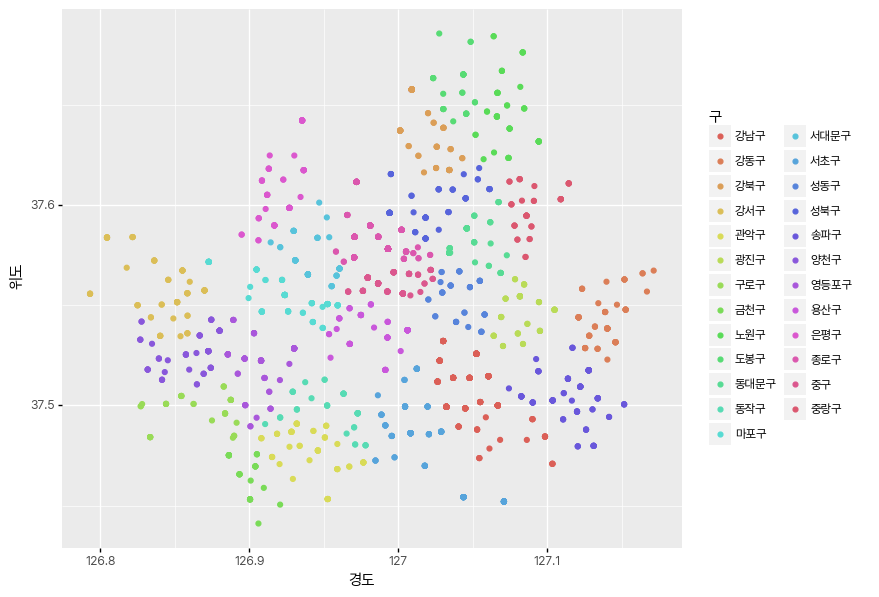

<ggplot: (-9223371910411809255)>

In [16]:
(
    ggplot(new_final, aes(x='경도', y='위도', color="구"))
        + geom_point()
        + theme(text=element_text(family='Pretendard'), figure_size=(8, 7))
)

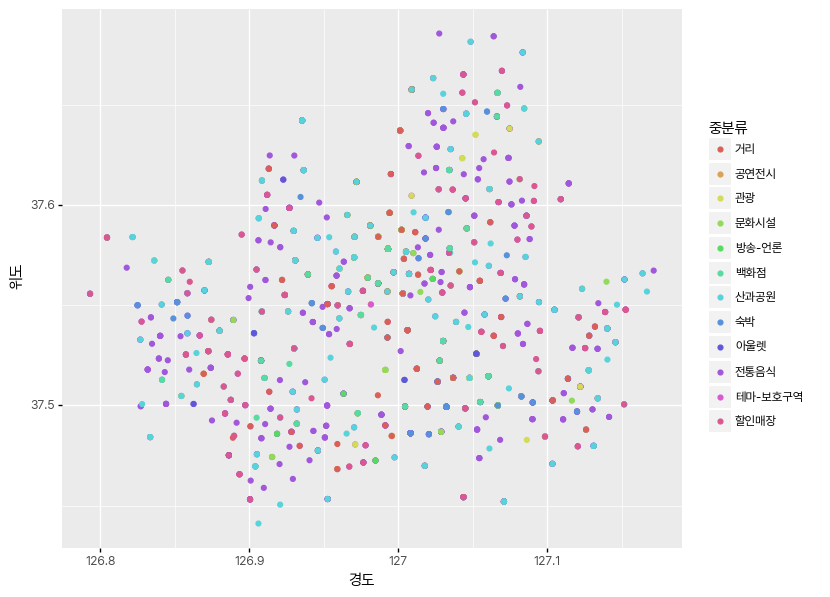

<ggplot: (-9223371910412033834)>

In [17]:
(
    ggplot(new_final, aes(x='경도', y='위도', color="중분류"))
        + geom_point()
        + theme(text=element_text(family='Pretendard'), figure_size=(8, 7))
)